## Лабораторная работа № 4. 
### Проверка статистических гипотез.
### Вариант 2

### *Задача 1. Nursing Home Data*

Сравнить расходы больницы за год (в сотнях долларов) для больниц расположенных за городом и в городе.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

from scipy import stats

In [2]:
df_1 = pd.read_csv('Nursing Home Data_data', encoding='utf-8', sep='\s+')
df_1.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


Проверяем, что расходы больницы за год расположенных за городом (```RURAL = 1```) отличаются расходы больницы за год расположенных в городе (```RURAL = 0```). Пробую применить критерий Стьюдента, но предварительно нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [3]:
x = df_1[df_1['RURAL'] == 1]['FEXP']
y = df_1[df_1['RURAL'] == 0]['FEXP']
x.name, y.name = 'rural', 'non-rural'

Проверяем нормальность распределений.

In [4]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

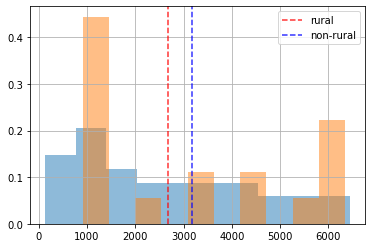

In [5]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f9df2d8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f9df2df70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f9df2d550>,
 'medians': [<matplotlib.lines.Line2D at 0x21f9df3c670>,
 'fliers': [<matplotlib.lines.Line2D at 0x21f9df3ca30>,
 'means': []}

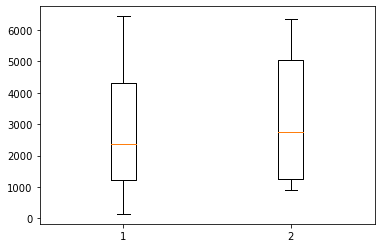

In [6]:
plt.boxplot([x, y])

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (больницы). На графике "Ящик с усами" видно, что медианы у выборок схожи, поэтому можем применить критерий Манна-Уитни.

In [7]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


p-value получился большим (меньше $\alpha = 0.01, 0.05$), поэтому у нас нет оснований отвергнуть гипотезу. Вывод: Годовые расходы больниц различаются незначимо.

### *Задача 2. Unions and State Labor Law.*

Сравниваются штаты, в которых принят закон State right-to-work law
и те, в которых закон не принят.

In [8]:
df_2 = pd.read_csv('Unions and State Labor Law_data', encoding='utf-8', sep='\s+', index_col='STATE')
df_2.head()

,DENS,COMP,RTW,PVT
STATE,,,,
NY,56.9,1,0,31.2
MI,49.6,1,0,30.2
WA,32.4,1,0,33.1
HI,54.6,1,0,24.7
AK,30.7,1,0,30.1


DENS - процент муниципальных служащих, и RTW - интересующий нас закон.

In [9]:
x = df_2[df_2['RTW'] == 1]['DENS']
y = df_2[df_2['RTW'] == 0]['DENS']
x.name, y.name = 'Принят', 'Не принят'

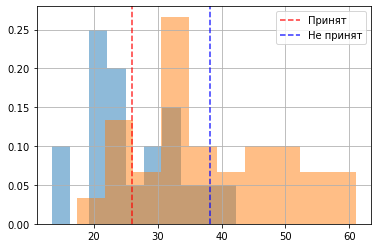

In [10]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f9e05f280>,
 'caps': [<matplotlib.lines.Line2D at 0x21f9e05f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f9e051ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x21f9e06c040>,
 'fliers': [<matplotlib.lines.Line2D at 0x21f9e06c3a0>,
 'means': []}

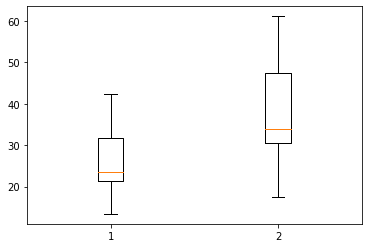

In [11]:
plt.boxplot([x, y])

На гистограмме видно, что данные отличаются от нормального распределения, а на графике "ящик с усами" медианы снова схожи, попробуем снова Манна-Уитни.

In [12]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.00010624487970362637


p-value получилось очень маленьким, отвергаем гипотезу. Вывод: Закон State right-to-work law принят в штатах где процент рабочих на гос и частном секторе очень мал по сравнению с штатами где процент работающих больше